 # 1.Importer les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# 2. Lecture du fichier

In [2]:
data = pd.read_csv('Mining_Dataset.csv')

# 3. Analyse des donées

In [3]:
data.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur


In [4]:
data.shape

(5247, 7)

In [5]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [7]:
data['Classe_Ic'].value_counts()

Classe_Ic
Dur        4080
Terne       628
Mi-dur      325
Liquide     201
Mou          10
Pateux        3
Name: count, dtype: int64

# 4. Prétraiment des données

In [8]:
list_object = ['Site','Classe_Ic']
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   int64  
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 287.1 KB


In [10]:
data.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,10,27.398758,-11.479370,1356.0,1.032063,0
1,2,10,27.398610,-11.478151,1354.0,27.390744,0
2,3,10,27.399395,-11.476759,1354.0,1.541371,0
3,4,10,27.399987,-11.475205,1354.0,1.081573,0
4,5,10,27.400558,-11.474226,1353.0,1.364352,0


In [11]:
data.corr().Classe_Ic.sort_values(ascending =False)

Classe_Ic    1.000000
Site         0.118282
Latitude     0.049534
Altitude    -0.012874
Longitude   -0.038096
N°          -0.061860
Ic          -0.150931
Name: Classe_Ic, dtype: float64

In [12]:
data['Classe_Ic'].value_counts()

Classe_Ic
0    4080
5     628
2     325
1     201
3      10
4       3
Name: count, dtype: int64

# 5. Division des données

In [13]:
X = data.iloc [:, :-1]
y_ = data.iloc[:, -1]
y = to_categorical(y_) 

In [14]:
print(X.shape)
print(y.shape)

(5247, 6)
(5247, 6)


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=8)

In [16]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3148, 6)
y_train: (3148, 6)
X_test: (2099, 6)
y_test: (2099, 6)


<Axes: >

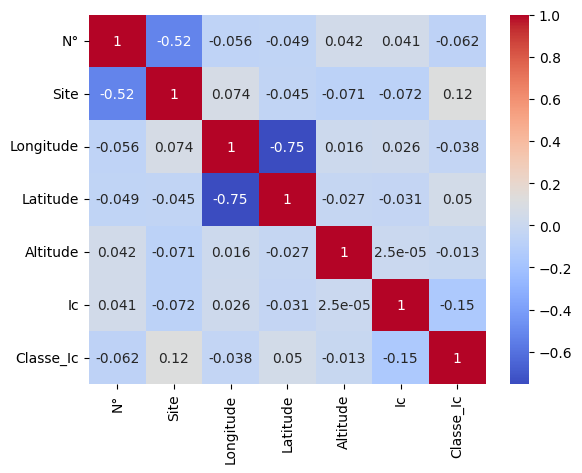

In [17]:
import seaborn as sns
sns.heatmap(data.corr(), annot =True, cmap='coolwarm')

# 6. Construction du ShallowNeural Network

In [18]:
model = Sequential()

In [19]:
model.add(Dense(200, input_shape = (6, ), activation='relu'))
#Ajout de la couche de sortie
model.add(Dense(y.shape[1], activation='softmax'))
#Compiler le model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#Affichage
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,606 (10.18 KB)

 Trainable params: 2,606 (10.18 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5157 - loss: 1135.7277 - val_accuracy: 0.7832 - val_loss: 8.8063
Epoch 2/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 9.8050 - val_accuracy: 0.7894 - val_loss: 4.4529
Epoch 3/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - loss: 6.5385 - val_accuracy: 0.7146 - val_loss: 3.9526
Epoch 4/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 4.8418 - val_accuracy: 0.7370 - val_loss: 5.3328
Epoch 5/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 4.6677 - val_accuracy: 0.7756 - val_loss: 3.9553
Epoch 6/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 5.6009 - val_accuracy: 0.6322 - val_loss: 3.5733
Epoch 7/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - loss: 3.7308 - val_accuracy: 0.7551 - val_loss: 3.2660
Epoch 8/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - loss: 3.5446 - val_accuracy: 0.6351 

# 6. Utilisation de 5 algorithmes de machinbe learning

In [21]:
X_train_, X_test_, y_train_, y_test_ = train_test_split( X, y_, test_size=0.4, random_state=8)

In [22]:
model_forest = RandomForestClassifier()

In [23]:
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9961886612672701


In [24]:
model_SVC = SVC()

In [25]:
model_SVC.fit(X_train_, y_train_)
y_pred = model_SVC.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.7837065269175798


In [26]:
model_Decision = DecisionTreeClassifier()

In [27]:
model_Decision.fit(X_train, y_train)
y_pred = model_Decision.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9995235826584088


In [28]:
model_neighbors = KNeighborsClassifier()

In [29]:
model_neighbors.fit(X_train, y_train)
y_pred = model_neighbors.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7360647927584564


In [30]:
model_logistic = LogisticRegression()

In [31]:
model_logistic.fit(X_train_, y_train_)
y_pred = model_logistic.predict(X_test_)
print(accuracy_score(y_test_, y_pred))

0.7946641257741782


# Simple prédiction

In [32]:
input = (1,	10,	27.398758,	-11.479370,	1356.0,	1.032063)
input_data = np.asarray(input)
input_data_reshaped = input_data.reshape(1,-1)
input_pred = model_forest.predict(input_data_reshaped)
input_pred

array([[1., 0., 0., 0., 0., 0.]])

# 7. Visualisation de  l’evolution de l’entrainement du réseau de neurone

In [33]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

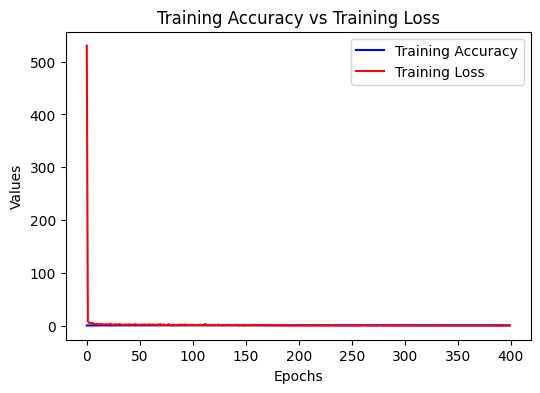

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

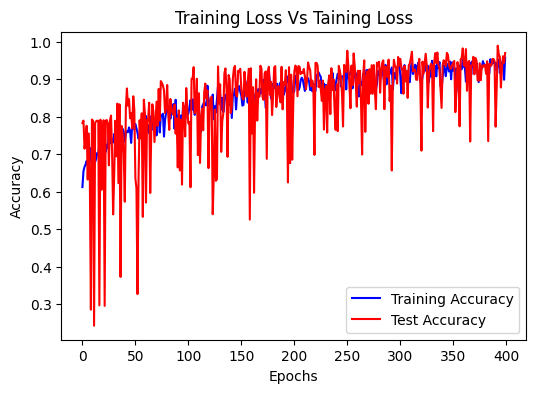

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Loss Vs Taining Loss')
plt.legend()
plt.show()

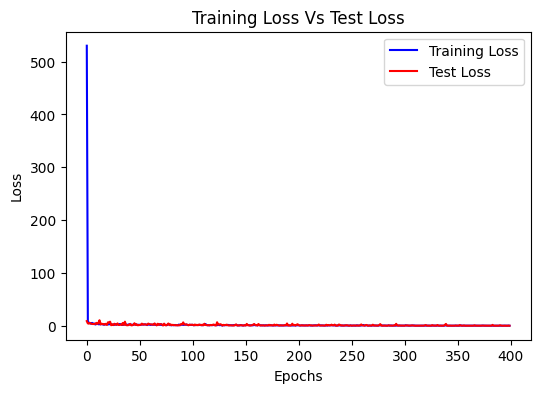

In [36]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()